<h1 align="center"> VIRTUAL LEARNING ENVIRONMENT DATASET ANALYSIS REPORT</h1>

## 

<h3 align="center">Author: Dao Le Bao Thoa</h3>
    <h3 align="center"> Year: 2021</h3>

# 

### Overview
1. Describing and analyzing OULAD Virtual Learning Environment dataset.
2. Processing and cleaning data.
3. Making insight.
4. Conclusion.

## 1. Describing and analyzing OULAD Virtual Learning Environment dataset.

<img src="model.png" alt="Drawing" style="width: 800px;"/>

#### Explaination schema:
- **code_module** code name of the module, which serves as the identifier.
- **code_presentation**- code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
- **length**- length of the module-presentation in days.
         Note: The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.
- **id_assessment**- identification number of the assessment.
- **assessment_type**- type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
- **date**- information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
- **weight**- weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.
- **id_site**- an identification number of the material.
- **activity_type** – the role associated with the module material.
- **id_student** – a unique identification number for the student.
- **gender** – the student’s gender.
- **region** – identifies the geographic region, where the student lived while taking the module-presentation.
- **highest_education** – highest student education level on entry to the module presentation.
- **imd_band** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
- **age_band** – band of the student’s age.
- **num_of_prev_attempts** – the number times the student has attempted this module.
- **studied_credits** – the total number of credits for the modules the student is currently studying.
- **disability** – indicates whether the student has declared a disability.
- **final_result** – student’s final result in the module-presentation.
- **date_registration** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
- **date_unregistration** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.
- **date_submitted** – the date of student submission, measured as the number of days since the start of the module presentation.
- **score** – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.
-**date** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
- **sum_click** – the number of times a student interacts with the material in that day.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_assessments = pd.read_csv('data/assessments.csv')
df_course = pd.read_csv('data/courses.csv')
df_studentAssessment = pd.read_csv('data/studentAssessment.csv')
df_studentInfo = pd.read_csv('data/studentInfo.csv')
df_studentRegis = pd.read_csv('data/studentRegistration.csv')
df_studentVle = pd.read_csv('data/studentVle.csv')
df_vle = pd.read_csv('data/vle.csv')

Base on the information about dataset on the website, there are seven table and divide into 3 groups. Using Python version 3.8.1 and and Pandas Package version 1.2.4 extract and analyze each table:

+ **Courses** (courses.csv):
    - Table size: (22, 3)
    - Table columns information: ['code_module' , 'code_presentation', 'module_presentation_length']
    - Checking duplicated values: None

In [2]:
df_course.sample(5).style.set_caption('Table course')

,code_module,code_presentation,module_presentation_length
11,DDD,2014B,241
19,GGG,2013J,261
0,AAA,2013J,268
1,AAA,2014J,269
6,CCC,2014J,269


#### 

+ **Student information** (studentInfo.csv):
     - Table size: (32593, 12)
     - Table columns information: ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']
     - Checking duplicated values:
          - The number of values that student take more than 1 course: 3808
          - The number of values that student take more than 1 course in the same presentaion: 1081
          - The number of values that student take a course more than 1 time: 1309

In [3]:
df_studentInfo.sample(5).style.set_caption('Table: Student information')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
28634,FFF,2014J,639522,M,South East Region,A Level or Equivalent,30-40%,0-35,0,90,N,Pass
16863,DDD,2014B,591654,M,North Region,A Level or Equivalent,10-20,0-35,0,60,N,Fail
27952,FFF,2014J,397219,M,Scotland,HE Qualification,20-30%,0-35,0,60,N,Distinction
13947,DDD,2013B,547897,F,Scotland,Lower Than A Level,40-50%,0-35,0,90,N,Withdrawn
20494,EEE,2014B,407428,M,West Midlands Region,Lower Than A Level,30-40%,0-35,0,60,N,Fail


#### 

+ **Assessments** (assessments.csv):
     - Table size: (206, 6)
     - Table columns information: ['code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'weight']
     - Checking duplicated values: None

In [4]:
df_assessments.sample(5).style.set_caption('Table: Assessments')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
190,GGG,2014B,37432,CMA,222.000000,0.000000
156,FFF,2014B,34896,CMA,227.000000,0.000000
180,GGG,2013J,37422,CMA,229.000000,0.000000
29,BBB,2013J,14996,TMA,19.000000,5.000000
205,GGG,2014J,37444,Exam,229.000000,100.000000


#### 

+ **Student assessment** (studentAssessment.csv):
     - Table size: (173912, 5)
     - Table columns information: ['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']
     - Checking duplicated values: None

In [5]:
df_studentAssessment.sample(5).style.set_caption('Table: Student Assessments')

,id_assessment,id_student,date_submitted,is_banked,score
25386,15005,579549,133,0,60.000000
58341,24295,689759,21,0,44.000000
97329,30710,594246,65,0,89.000000
125428,34879,595655,109,0,96.000000
17940,14998,590360,95,0,57.000000


#### 

+ **Student Registration** (studentRegistration.csv):
     - Table size: (32593, 5)
     - Table columns information: ['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration']
     - Checking duplicated values:
         + The number of values that student register more than 1 courses: 3808
         + The number of values that student register more than 1 courses in the same semester: 1081
         + The number of values that student register a course more than 1 time: 1309

In [6]:
df_studentRegis.sample(5).style.set_caption('Table: Student registration')

,code_module,code_presentation,id_student,date_registration,date_unregistration
28188,FFF,2014J,558764,-10.000000,nan
14358,DDD,2013B,2629511,-73.000000,-25.000000
11792,CCC,2014J,608983,-22.000000,17.000000
10506,CCC,2014B,2410459,-29.000000,nan
30318,GGG,2013J,574238,-148.000000,nan


#### 

+ **Student Vle** (studentVle.csv):
     - Table size: (10655280, 6)
     - Table columns information: ['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click']
     - Checking duplicated values:
         + Students interact to the material in the virtual learning environment: Many

In [7]:
df_studentVle.sample(5).style.set_caption('Table: Student virtual learning environment')

,code_module,code_presentation,id_student,id_site,date,sum_click
5011901,DDD,2014J,147328,813708,89,2
7005134,FFF,2013B,467725,527230,162,1
535943,BBB,2013B,555930,542864,60,12
4665463,DDD,2014B,612136,772705,177,10
3720891,DDD,2013J,580468,673537,-1,1


#### 

+ **Vle** (vle.csv):
     - Table size: (6364, 6)
     - Table columns information: ['id_site', 'code_module', 'code_presentation', 'activity_type',
       'week_from', 'week_to']
     - Checking duplicated values: None

In [8]:
df_vle.sample(5).style.set_caption('Table: virtual learning environment material')

,id_site,code_module,code_presentation,activity_type,week_from,week_to
327,877236,AAA,2014J,resource,nan,nan
608,543281,BBB,2013B,resource,nan,nan
318,877396,AAA,2014J,url,nan,nan
1024,704157,BBB,2013J,resource,nan,nan
4664,716295,FFF,2013J,oucontent,11.000000,11.000000


       In conclusion, We devide 7 tables into 3 groups in order that it is easy to make analyzing and insight.

#### 

## 2. Processing and cleaning data.

### 2.1 Processing data about courses:

- Input tables: 
    + Course
    + Assessment
    + Student assessment
    + Student information
    + Student registration
- Method: using pandas api **groupby**, **merge** to group and create new table, use api **drop** to clear null value and **rename** some columns.
- Output table:
    + Course information (df_course_info):
        - Table size: (22,13)
        - Table columns: ['code_module', 'code_presentation', 'module_presentation_length',
       'num_of_assessment', 'avg_score', 'students_take_exam',
       'num_of_student', 'Pass', 'Fail', 'Withdrawn', 'Distinction',
       'num_of_soon_regis', 'num_of_unregis']
        - Checking duplicated values: None

In [9]:
df_num_of_assess = df_assessments.groupby(['code_module','code_presentation'])\
                                 .agg({'id_assessment':'count'}).reset_index()

df_course_info = df_course.merge(df_num_of_assess,on=['code_module','code_presentation'],how='left')

df_Asem_average_score = df_studentAssessment.groupby('id_assessment')\
                                            .agg({'score' : 'mean', 'id_student' : 'count'}).reset_index()

df_Asem_average_score.rename(columns={'score':'avg_score','id_student' : 'students_take_exam'},inplace=True)

df_Asem_score = df_assessments.merge(df_Asem_average_score,on='id_assessment',how='left')

nan_score_value = df_Asem_score[df_Asem_score['avg_score'].isnull()].index        # Check nan average score value

df_Asem_score = df_Asem_score.drop(nan_score_value).reset_index()

df_Asem_score_per_course = df_Asem_score.groupby(['code_module','code_presentation'])\
                                        .agg({'avg_score':'mean','students_take_exam':'mean'}).reset_index()

df_course_info = df_course_info.merge(df_Asem_score_per_course,on=['code_module','code_presentation'],how='left')

df_studentInfo_num_of_student = df_studentInfo.groupby(['code_module','code_presentation'])\
                                              .agg({'id_student':'count'}).reset_index()

df_course_info = df_course_info.merge(df_studentInfo_num_of_student,on=['code_module','code_presentation'],how='left')

df_studentInfo_final_result = df_studentInfo.groupby(['final_result','code_module','code_presentation']).agg({'id_student':'count'})

df_Pass = df_studentInfo_final_result.loc['Pass'].reset_index()
df_Pass.rename(columns={'id_student':'Pass'},inplace=True)
df_Fail = df_studentInfo_final_result.loc['Fail'].reset_index()
df_Fail.rename(columns={'id_student':'Fail'},inplace=True)
df_Withdrawn = df_studentInfo_final_result.loc['Withdrawn'].reset_index()
df_Withdrawn.rename(columns={'id_student':'Withdrawn'},inplace=True)
df_Distinction = df_studentInfo_final_result.loc['Distinction'].reset_index()
df_Distinction.rename(columns={'id_student':'Distinction'},inplace=True)

df_all_finalresult = df_Pass.merge(df_Fail,on=['code_module','code_presentation'])\
                            .merge(df_Withdrawn,on=['code_module','code_presentation'])\
                            .merge(df_Distinction,on=['code_module','code_presentation'])

df_course_info = df_course_info.merge(df_all_finalresult,on=['code_module','code_presentation'])

df_regis_soon = df_studentRegis[df_studentRegis['date_registration'] < 0]\
                                .groupby(['code_module','code_presentation']).agg({'date_registration':'count'}).reset_index()

df_unregis = df_studentRegis.groupby(['code_module','code_presentation']).agg({'date_unregistration':'count'}).reset_index()

df_course_info = df_course_info.merge(df_regis_soon,on=['code_module','code_presentation'])\
                                .merge(df_unregis,on=['code_module','code_presentation'])

df_course_info.rename(columns={'id_assessment':'num_of_assessment','id_student':'num_of_student'},inplace=True)
df_course_info.rename(columns={'date_registration':'num_of_soon_regis','date_unregistration':'num_of_unregis'},inplace=True)
df_course_info.style.set_caption('Table 1: Course information')

,code_module,code_presentation,module_presentation_length,num_of_assessment,avg_score,students_take_exam,num_of_student,Pass,Fail,Withdrawn,Distinction,num_of_soon_regis,num_of_unregis
0,AAA,2013J,268,6,69.448600,326.600000,383,258,45,60,20,379,60
1,AAA,2014J,269,6,68.631236,303.200000,365,229,46,66,24,361,66
2,BBB,2013J,268,12,78.982208,1306.818182,2237,896,521,644,176,2217,647
3,BBB,2014J,262,6,66.123764,1481.600000,2292,972,391,749,180,2235,736
4,BBB,2013B,240,12,79.132027,1023.272727,1767,648,459,505,155,1757,505
5,BBB,2014B,234,12,78.912318,908.454545,1613,561,396,490,166,1595,489
6,CCC,2014J,269,10,74.501944,1272.333333,2498,709,406,1077,306,2482,1049
7,CCC,2014B,241,10,71.527308,832.111111,1936,471,375,898,192,1927,898
8,DDD,2013J,261,7,68.729022,1133.714286,1938,731,428,681,98,1927,684
9,DDD,2014J,262,7,70.831078,1144.714286,1803,680,364,647,112,1796,631


NOTE- Explaination schema:
+ **num_of_assessment** - the number of assessments in the presentation
+ **avg_score** - average score per student in specific course and presentation
+ **students_take_exam** - the number of average students taking exam in specific course and presentation
+ **num_of_student** - the number of students in specific course and presentation
+ **Pass** - the number of students passing in specific course and presentation
+ **Fail** - the number of students failing in specific course and presentation
+ **Withdrawn** - the number of students withdrawning in specific course and presentation
+ **Distinction** - the number of distinction students in specific course and presentation
+ **num_of_soon_regis** - the number of students registering course soon in specific course and presentation
+ **num_of_unregis** - the number of students unregistraion course in specific course and presentation

Note:   After clearing table some data is missing (for example: data about assessment exam)

#### 

### 2.2 Processing data about student

- Input tables: 
    + student Assessment
    + assessment
    + student information
    + studentVle
    + student registration
- Method: using pandas api **groupby**, **merge** to group and create new table, value and **rename** some columns.
- Output table:
    + Student detailed information (df_studentInfo_score):
        - Table size: (32593, 17)
        - Table columns: ['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'avg_score',
       'num_of_assess_take', 'sum_click', 'soon_regis', 'un_regis']
        - Checking duplicated values:
            + The number of values that student take more than 1 course: 3808
            + The number of values that student take more than 1 course in the same semester: 1081
            + The number of values that student take a course more than 1 time: 1309

In [10]:
df_student_Avg_score_by_each_asem = df_studentAssessment[['id_student','id_assessment','score','date_submitted']]

df_student_Avg_score_by_each_asem = df_student_Avg_score_by_each_asem.merge(df_assessments,on='id_assessment',how='left')

df_student_Avg_score_whole_asem = df_student_Avg_score_by_each_asem.groupby(['id_student','code_module','code_presentation'])\
                                                                   .agg({'score':'mean','date_submitted':'count'}).reset_index()

df_studentInfo_score = df_studentInfo.merge(df_student_Avg_score_whole_asem,left_on=['code_module','code_presentation','id_student'],
                                           right_on=['code_module','code_presentation','id_student'],how='left')

df_studentVle_click = df_studentVle.groupby(['id_student','code_module','code_presentation']).agg({'sum_click' : 'sum'}).reset_index()

df_studentInfo_score = df_studentInfo_score.merge(df_studentVle_click,left_on=['code_module','code_presentation','id_student'],
                                           right_on=['code_module','code_presentation','id_student'],how='left')

df_studentInfo_score.rename(columns={'score':'avg_score','date_submitted':'num_of_assess_take'},inplace=True)

df_studentRegis['soon_regis'] = df_studentRegis['date_registration'] < 0

df_studentRegis['un_regis'] = df_studentRegis['date_unregistration'].notna()

df_studentInfo_score = df_studentInfo_score.merge(df_studentRegis[['code_module','code_presentation','id_student','soon_regis','un_regis']],
                                           left_on=['code_module','code_presentation','id_student'],
                                           right_on=['code_module','code_presentation','id_student'],how='left')

df_studentInfo_score

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,avg_score,num_of_assess_take,sum_click,soon_regis,un_regis
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.000000,5.0,934.0,True,False
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,66.400000,5.0,1435.0,True,False
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,NaN,NaN,281.0,True,True
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.000000,5.0,2158.0,True,False
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,54.400000,5.0,1034.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,NaN,NaN,41.0,True,False
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,88.111111,9.0,893.0,True,False
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,76.666667,9.0,312.0,True,False
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,91.500000,2.0,275.0,True,True


**Table 2: Student detailed information**

NOTE- Explaination schema:
+ **num_of_assess_take** - the number of times that student take assessment
+ **sum_click** - the number of clicks that student interact with material of VLE
+ **soon_regis** - the student register a course soon compared to the start date of course or not
+ **un_regis** - the student unregis a course

#### 

### 2.3 Processing data about material and assessment type

#### 2.3.1 Material

- Input tables: 
    + studentVle
    + vle
- Method: using pandas api **groupby**, **merge** to group and create new table, value and **drop** to remove nan values.
- Output table:
    + Material (df_material_click):
        - Table size: (232,1)
        - Table columns: ['sum_click'], index -['code_module','code_presentation','activity_type']
        - Checking duplicated values: None

In [11]:
df_material = df_studentVle.groupby('id_site').agg({'sum_click':'sum'}).reset_index()

df_material_click = df_vle.merge(df_material,on='id_site',how='left')

nan_click_value = df_material_click[df_material_click['sum_click'].isna()].index

df_material_click.drop(nan_click_value,inplace=True)

df_material_click = df_material_click.groupby(['code_module','code_presentation','activity_type']).agg({'sum_click':'sum'})

df_material_click

sum_click
code_module code_presentation activity_type           
AAA         2013J             dataplus          1843.0
                              forumng         175513.0
                              glossary           327.0
                              homepage        140345.0
                              oucollaborate      241.0
...                                                ...
GGG         2014J             homepage         83253.0
                              oucontent       156045.0
                              quiz             57337.0
                              resource         26147.0
                              subpage          17488.0

[232 rows x 1 columns]

**Table 3: Material**

#### 2.3.2 Assessment type

- Input tables: 
    + studentVle
    + vle
- Method: using pandas api **groupby**, **merge** to group and create new table, value and **drop** to remove nan values.
- Output table:
    + Assessment_type (df_assessments_type):
        - Table size: (41, 3)
        - Table columns: ['assessment_type','avg_score','students_take_exam'], index -['code_module','code_presentation']
        - Checking duplicated values: None

In [12]:
df_assessments_type = df_Asem_score.groupby(['code_module','code_presentation','assessment_type'])\
                             .agg({'avg_score':'mean','students_take_exam':'mean'}).reset_index()\
                                                    .set_index(['code_module','code_presentation'])

df_assessments_type.head(10)

assessment_type  avg_score  students_take_exam
code_module code_presentation                                               
AAA         2013J                         TMA  69.448600          326.600000
            2014J                         TMA  68.631236          303.200000
BBB         2013B                         CMA  87.978861         1009.800000
            2013B                         TMA  71.759665         1034.500000
            2013J                         CMA  87.788918         1283.200000
            2013J                         TMA  71.643283         1326.500000
            2014B                         CMA  87.270401          898.600000
            2014B                         TMA  71.947250          916.666667
            2014J                         TMA  66.123764         1481.600000
CCC         2014B                         CMA  70.471546          980.000000

**Table 4: Assessment Type**

Note: Data about exams is missing

#### Conclusion

* Directions in analyzing after grouping into 4 table:
    + Courses data:
        - Taking the whole detailed picture throughtout platform, courses, and presentation semester.
        => Comparing figure and making conclusion about course that attract most student
    + Student data:
        - Summarizing in specific features (gender, age_band,..)
        => Analyzing target students 
        - Summarizing withdrawn student
        => Understanding the reason
    + Material and Assessment type:
        - Compare figure
        => Evaluating frequency that student go the site and average score and the number of student take each exam

#### 

## 3. Summarizing, Visualizing and Making insights of data

### 3.1 Courses data

- ***Summary data in virtual learning platforms:***

In [13]:
df_sum = df_course_info.sum(axis=0).to_frame(name='Total')

df_sum.drop(['code_module','module_presentation_length','avg_score','code_presentation'],axis=0,inplace=True)

df_sum.astype(int).style.set_caption('Summary 3.1.1: total students in VLE according to features')

,Total
num_of_assessment,206
students_take_exam,19354
num_of_student,32593
Pass,12361
Fail,7052
Withdrawn,10156
Distinction,3024
num_of_soon_regis,32312
num_of_unregis,10072


    Note:
        - num_of_student - The number of students taking course (regard with duplicated values)

- ***Summary data per courses:***

In [14]:
df_sum_by_course = df_course_info.groupby('code_module').agg({
                                                             'num_of_assessment':'sum',
                                                             'num_of_student':'sum',
                                                             'students_take_exam' : 'sum',
                                                              'Pass':'sum',
                                                              'Distinction':'sum',
                                                              'Fail':'sum',
                                                              'Withdrawn':'sum',
                                                              'avg_score' : 'mean',
                                                              'num_of_soon_regis':'sum',
                                                              'num_of_unregis':'sum',
                                                             })
df_sum_by_course = df_sum_by_course.astype(int).transpose()
df_sum_by_course.style.highlight_max(color='lightgreen',axis=1).highlight_min(color='bisque',axis=1)\
                      .set_caption('Summary 3.1.2: Total students of each course according to features')

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG
num_of_assessment,12,42,20,35,15,52,30
num_of_student,748,7909,4434,6272,2934,7762,2534
students_take_exam,629,4720,2104,3668,1973,4567,1691
Pass,487,3077,1180,2227,1294,2978,1118
Distinction,44,677,498,383,356,670,396
Fail,91,1767,781,1412,562,1711,728
Withdrawn,126,2388,1975,2250,722,2403,292
avg_score,69,75,73,69,80,77,80
num_of_soon_regis,740,7804,4409,6228,2921,7723,2487
num_of_unregis,126,2377,1947,2235,718,2380,289


Note: 
    + **'Bisque color'** : min value / **'Light green color'** : max value 

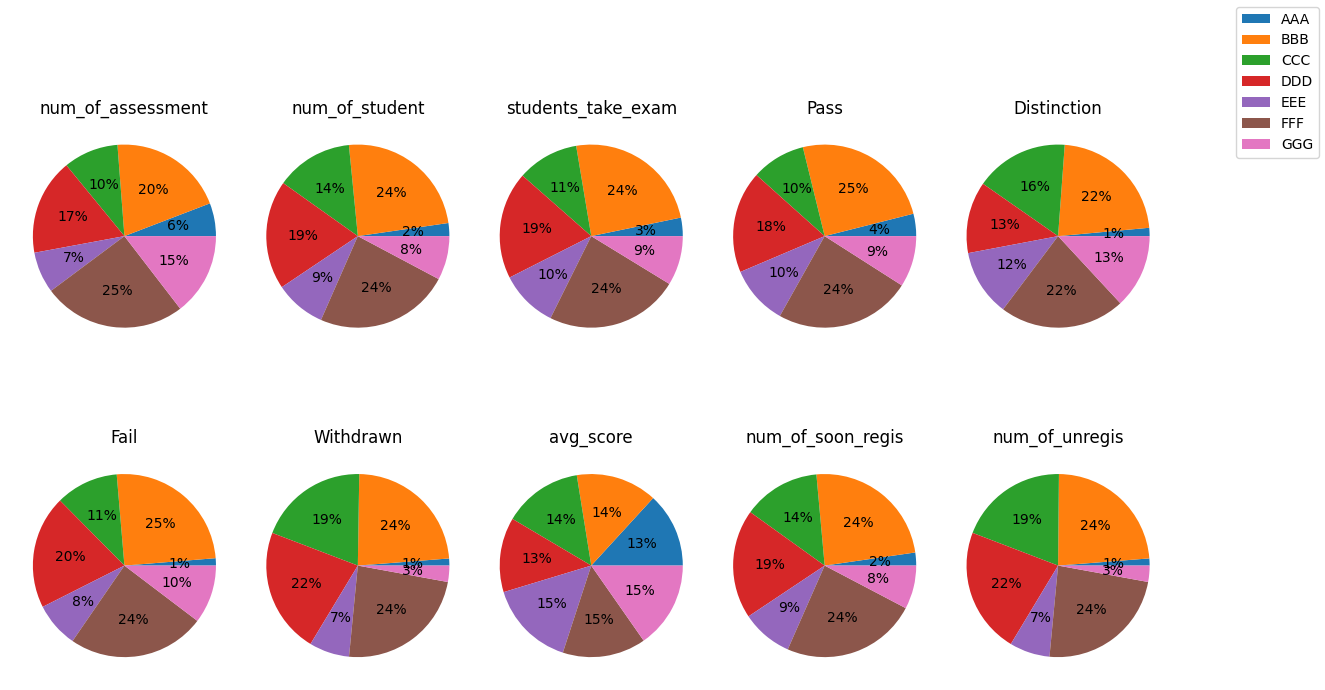

In [15]:
fig,axj = plt.subplots(nrows=2,ncols=5,figsize=(15, 8),dpi=100)

for i, (idx, row) in enumerate(df_sum_by_course.iterrows()):
    ax = axj[i//5,i%5]
    row = row[row.gt(row.sum()*.01)]
    ax.pie(row,autopct='%.0f%%')
    ax.set_title(idx)
fig.legend(df_sum_by_course.columns)
fig.subplots_adjust(wspace=.02)

**Figure 3.1.1: Display the persentage of students each course according to features**

#### 

- ***Summary data in per course and each presentation***

In [16]:
df_course_info[['code_module','code_presentation','num_of_student']].sort_values(by='num_of_student',ascending=False).head(10).reset_index(drop=True).style.set_caption('Table 3.1.2: Courses information top 10 largest courses ')

,code_module,code_presentation,num_of_student
0,CCC,2014J,2498
1,FFF,2014J,2365
2,BBB,2014J,2292
3,FFF,2013J,2283
4,BBB,2013J,2237
5,DDD,2013J,1938
6,CCC,2014B,1936
7,DDD,2014J,1803
8,BBB,2013B,1767
9,FFF,2013B,1614


In [17]:
import ipywidgets as widgets

code_module = df_course_info['code_module'].unique()

choices = widgets.RadioButtons(
                options=code_module,
                desciption='Choose:',
                disabled=False
                )

def plot_by_course(df_course_info,name_of_course):
    features = ['students_take_exam','num_of_student','num_of_soon_regis','num_of_unregis','avg_score']
    df_course_info_c = df_course_info[df_course_info['code_module'] == name_of_course].set_index('code_presentation')
    df_course_info_c[features].transpose().plot.barh(figsize=(15,8))
    
def plot_by_pie_final_result(df_course_info,name_of_course):
    features = ['Distinction','Pass','Fail','Withdrawn']
    df_course_info_c = df_course_info[df_course_info['code_module'] == name_of_course].set_index('code_presentation')
    df_course_info_c[features].transpose().plot.pie(subplots=True,figsize=(16,8),autopct='%1.1f%%')

def show_figure(Choose):
    plot_by_course(df_course_info,Choose)
    plot_by_pie_final_result(df_course_info,Choose)

show_chart = widgets.interactive(show_figure,Choose=choices)

display(show_chart)

interactive(children=(RadioButtons(description='Choose', options=('AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'G…

**Figure 3.1.2: The number of student in vle of each presentation semester and Figure 3.1.3: The percentage of students in the final result**

#### 

### 3.2 Student data

In [18]:
df_studentInfo_score_unique = df_studentInfo_score[df_studentInfo_score['id_student'].duplicated() == False]
df_studentInfo_score_unique.head(10).style.set_caption('Table 3.2: Student detailed information (the first 10 rows)')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,avg_score,num_of_assess_take,sum_click,soon_regis,un_regis
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.000000,5.000000,934.000000,True,False
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,66.400000,5.000000,1435.000000,True,False
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,nan,nan,281.000000,True,True
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.000000,5.000000,2158.000000,True,False
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,54.400000,5.000000,1034.000000,True,False
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,68.000000,5.000000,2445.000000,True,False
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass,68.000000,5.000000,1492.000000,True,False
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass,72.400000,5.000000,1428.000000,True,False
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass,71.400000,5.000000,1894.000000,True,False
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,nan,55<=,0,60,N,Pass,78.000000,5.000000,3158.000000,True,False


* **Number of students that participate in the virtual learning platform** : 28785

In [19]:
features = ['gender','highest_education','age_band','disability','final_result','soon_regis','un_regis']

selected = widgets.Dropdown(
    options = features,
    value = 'gender',
    description = 'Features'
)

def plot_percentage(feature):
    f = plt.figure(figsize=(15,8))
        
    plt.title('The percentage of student by '+ str(feature), color='black')
    frame = df_studentInfo_score_unique[feature].value_counts().to_frame()
    frame.plot(kind='pie',subplots=True,autopct='%1.1f%%',ax=f.gca())
     
    plt.legend(loc='center left', bbox_to_anchor=(1.7, 0.5))
    frame = frame.transpose()
    the_table = plt.table(cellText=frame.values, colLabels=frame.columns, loc='bottom',rowLabels=frame.index,cellLoc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)
    the_table.scale(2.5,2.5)
    plt.show()

show_feature = widgets.interactive(plot_percentage,feature=selected)
display(show_feature)

interactive(children=(Dropdown(description='Features', options=('gender', 'highest_education', 'age_band', 'di…

**Figure 3.2 the percentage of students and the number of students that are categorized according to features**

#### 

### 3.2.1 Data of withdrawn students

In [20]:
df_ST_withdrawn = df_studentInfo_score.loc[df_studentInfo_score['final_result'] == 'Withdrawn']

#df_ST_withdrawn.drop(columns=['region','imd_band','num_of_prev_attempts','studied_credits'],axis=0,inplace=True)

df_ST_withdrawn.sort_values(by='avg_score').head(10).style.set_caption('Table 3.2.1: Top first 10 withdrawn students that have high score ')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,avg_score,num_of_assess_take,sum_click,soon_regis,un_regis
9523,CCC,2014B,575419,M,West Midlands Region,Lower Than A Level,50-60%,0-35,0,90,N,Withdrawn,0.000000,1.000000,198.000000,False,True
26262,FFF,2014B,163962,M,Yorkshire Region,A Level or Equivalent,60-70%,0-35,3,120,N,Withdrawn,0.000000,1.000000,19.000000,True,True
11370,CCC,2014J,566664,M,London Region,A Level or Equivalent,40-50%,0-35,1,60,N,Withdrawn,0.000000,1.000000,155.000000,True,True
7690,BBB,2014J,656122,F,Ireland,Lower Than A Level,30-40%,35-55,0,60,N,Withdrawn,0.000000,1.000000,283.000000,True,True
11300,CCC,2014J,554444,F,West Midlands Region,Lower Than A Level,10-20,0-35,0,60,N,Withdrawn,0.000000,1.000000,34.000000,True,True
11201,CCC,2014J,529723,M,South West Region,A Level or Equivalent,40-50%,0-35,0,90,N,Withdrawn,0.000000,1.000000,170.000000,True,True
12359,CCC,2014J,652994,M,North Western Region,Lower Than A Level,10-20,0-35,0,120,N,Withdrawn,0.000000,1.000000,71.000000,True,True
10992,CCC,2014J,469614,M,Wales,Lower Than A Level,10-20,0-35,1,90,N,Withdrawn,0.000000,1.000000,51.000000,True,True
10980,CCC,2014J,465764,F,East Midlands Region,Lower Than A Level,30-40%,35-55,1,60,Y,Withdrawn,0.000000,1.000000,119.000000,True,True
10635,CCC,2014J,96864,M,West Midlands Region,HE Qualification,20-30%,0-35,0,30,N,Withdrawn,0.000000,1.000000,96.000000,True,True


* **The number of withdrawn student that take a course more than 1 time**: 497
* **The number of withdrawn student that take more than 1 course in the same semester**: 365  

In [21]:
features = ['gender','highest_education','age_band','disability','soon_regis','un_regis']

selected = widgets.Dropdown(
    options = features,
    value = 'gender',
    description = 'Features'
)

def plot_percentage(feature):
    f = plt.figure(figsize=(15,8))
        
    plt.title('The percentage of student by '+ str(feature), color='black')
    frame = df_ST_withdrawn[feature].value_counts().to_frame()
    frame.plot(kind='pie',subplots=True,autopct='%1.1f%%',ax=f.gca())
     
    plt.legend(loc='center left', bbox_to_anchor=(1.7, 0.5))
    frame = frame.transpose()
    the_table = plt.table(cellText=frame.values, colLabels=frame.columns, loc='bottom',rowLabels=frame.index,cellLoc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)
    the_table.scale(2.5,2.5)
    plt.show()

show_feature = widgets.interactive(plot_percentage,feature=selected)
display(show_feature)

interactive(children=(Dropdown(description='Features', options=('gender', 'highest_education', 'age_band', 'di…

**Figure 3.2 the percentage of withdrawn students and the number of withdrawn students that are categorized according to features**

### 3.3 Data about material and assessment type

### 3.3.1 Material

In [22]:
code_module = df_course_info['code_module'].unique()

choices = widgets.RadioButtons(
                options=code_module,
                desciption='Choose:',
                disabled=False
                )

def show_table(Choose):
    df_material_class = df_material_click.loc[Choose]
    index = df_material_class.index.get_level_values('code_presentation').unique()
    for i in index:
        display(df_material_class.loc[i].astype(int).style.bar(subset='sum_click',color='lightgreen')\
                   .set_caption('The material in ' + str(i) + ' presentation'))
    

show_tb = widgets.interactive(show_table,Choose=choices)

display(show_tb)

interactive(children=(RadioButtons(description='Choose', options=('AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'G…

**Table 3.3.1 The material of each presentation semester 2013,2014**

### 3.3.2 Assessment type:

In [23]:

code_module = df_course_info['code_module'].unique()

choices = widgets.RadioButtons(
                options=code_module,
                desciption='Choose:',
                disabled=False
                )

def show_table_2(Choose):
    df_assessments_type['students_take_exam'] = df_assessments_type['students_take_exam'].astype(int)
    display(df_assessments_type.loc[Choose].reset_index().style.highlight_max(color='lightgreen')\
            .highlight_min(color='bisque').hide_index())
    

show_tb_2 = widgets.interactive(show_table_2,Choose=choices)

display(show_tb_2)

interactive(children=(RadioButtons(description='Choose', options=('AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'G…

**Table 3.2.2 The assessment types and average score, the number of students in a specific course**

## 4 Conclusion:

After analyzing data, it's clearly to see that almost all courses had the figure that decreased throughout 2013, 2014. Besides that, the number of withdrawn students was high. 
* In the table 3.1.1, we can see that:
    - Course **'AAA'** had min values at all features
    - Course **'BBB'** had max values at almost features
    - Courses **'EEE'** and **'GGG'** had a higher average score than others
    - Course **'FFF'** had the largest number of student that unregister from course 
* In the figure 3.1.1:
    =>  Course **'BBB'** accounted for the highest percentage in almost fature.
* In the figure 3.1.2:
    - The number of student almost descreased in each presentation semester.
* In the 3.2 at the feature final_result:
    - The percentage of withdrawn students accounted for the second high quarter of the final result.

## Weakness

* It's hard for me to make the conclusion, I know, it's a bad weak point for data analysts. I think that I don't have enough experience to make a perfect conclusion. And I would try hard every day to improve it.
* Unfinished task:
    - Make the perfect conclusion
    - Grouping withdrawn students in some new features base on the number of clicks, the number of assessment that students take => Categorizing group of students and giving the reason why those students wanted to withdraw
     + Methode use: dividing sum_click, num_of_assess_take into 5 ranges and categorizing base on this range, and then visualizing pie charts to see the percentage of students in each range.
     + Modifying and detailing all charts.
* My file is quite hard to run, and if I convert it into pdf or HTML file, the interactive figures are closed. Please, I have 2 images of the whole dashboard that are converted into pdf in order to visualize (they are not complete).

## NOTE:
* Python version 3.8
* If you want to interactive with the notebook, Please:
    - install some required libraries by running below commands:
        - pip install pandas
        - pip install matplotlib
        - pip install jupyter notebook
    - Open in the jupyter notebook:
        - In command line promps: 
            + cd [Directory of file here]
            + jupyter notebook
            + localhost:8080 is opened
            + click that file 'Report_Analysis_VLE_data.ipynb'
            + click cell and selected run all
        - To visualize dashboard in pdf:
            + PDF image 1: Report_analysis_VLE_data_PDF_image_1.pdf
    - Open with voila:
        - In command line promps:
            + pip install voila
            + Run voila [Directory]/Report_Analysis_VLE_data.ipynb
            + localhost:8866 is opened
        - To visualize dashboard in pdf:
            + PDF image 2: Report_analysis_VLE_data_PDF_image_2.pdf